# Train Model Logistics

In [6]:
from sklearn.preprocessing import LabelEncoder

# Đọc file CSV
df = pd.read_csv("dulieutrain.csv", sep=",")

# Chuyển đổi "Churn" thành số
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Chuyển đổi "Contract" thành số
encoder = LabelEncoder()
df["Contract"] = encoder.fit_transform(df["Contract"])

# Lưu lại file đã được chuẩn bị
df.to_csv("processed_data.csv", index=False)


In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib

In [4]:
pip install pandas scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pandas as pd
import joblib

# Đọc dữ liệu đã xử lý
df = pd.read_csv("processed_data.csv")

# Kiểm tra nếu Contract chưa phải số thì cần xử lý
if df["Contract"].dtype == "O":  # "O" nghĩa là Object (chuỗi)
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    df["Contract"] = encoder.fit_transform(df["Contract"])

# Chia dữ liệu thành biến đầu vào (X) và biến mục tiêu (y)
X = df[["MonthlyCharges", "Contract"]]
y = df["Churn"]

# Chia dữ liệu thành tập train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu (Chỉ chuẩn hóa MonthlyCharges, không cần cho Contract nếu đã mã hóa)
scaler = StandardScaler()
X_train[["MonthlyCharges"]] = scaler.fit_transform(X_train[["MonthlyCharges"]])
X_test[["MonthlyCharges"]] = scaler.transform(X_test[["MonthlyCharges"]])

# Áp dụng SMOTE để làm cân bằng dữ liệu trên tập train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
model.fit(X_train_res, y_train_res)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Độ chính xác: {accuracy * 100:.2f}%")

# Xuất báo cáo chi tiết
print("\n📊 Báo cáo đánh giá mô hình:")
print(classification_report(y_test, y_pred))

# Lưu mô hình và scaler để sử dụng sau này
joblib.dump(model, "logistic_model_2.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Mô hình và scaler đã được lưu!")


🎯 Độ chính xác: 69.55%

📊 Báo cáo đánh giá mô hình:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.79      0.58       374

    accuracy                           0.70      1409
   macro avg       0.68      0.72      0.67      1409
weighted avg       0.78      0.70      0.71      1409

✅ Mô hình và scaler đã được lưu!


d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Phân bố ban đầu của y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

===== Mô hình cơ bản =====
Accuracy: 0.6948
F1 Score: 0.5768
Precision: 0.4564
Recall: 0.7834
ROC AUC: 0.7800
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1035
           1       0.46      0.78      0.58       374

    accuracy                           0.69      1409
   macro avg       0.68      0.72      0.67      1409
weighted avg       0.78      0.69      0.71      1409



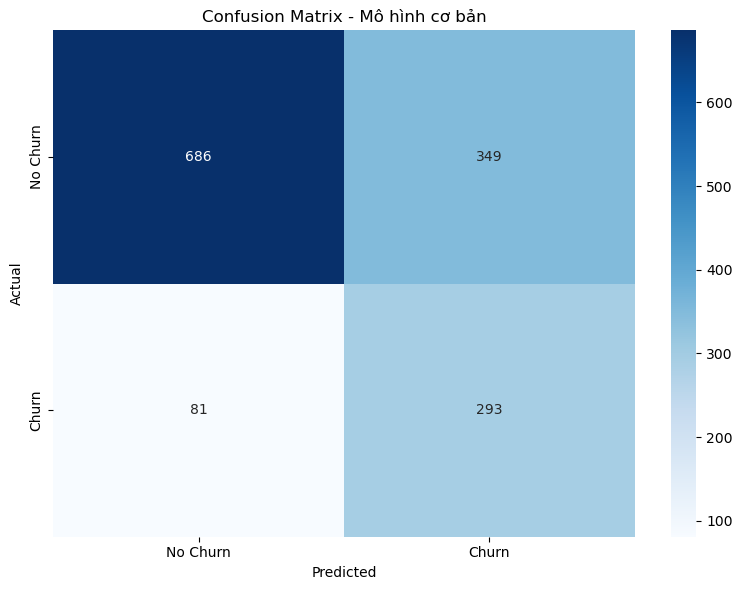


Confusion Matrix Details:
True Negatives: 686
False Positives: 349
False Negatives: 81
True Positives: 293

===== SMOTE =====
Accuracy: 0.6955
F1 Score: 0.5782
Precision: 0.4572
Recall: 0.7861
ROC AUC: 0.7800
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.79      0.58       374

    accuracy                           0.70      1409
   macro avg       0.68      0.72      0.67      1409
weighted avg       0.78      0.70      0.71      1409



d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


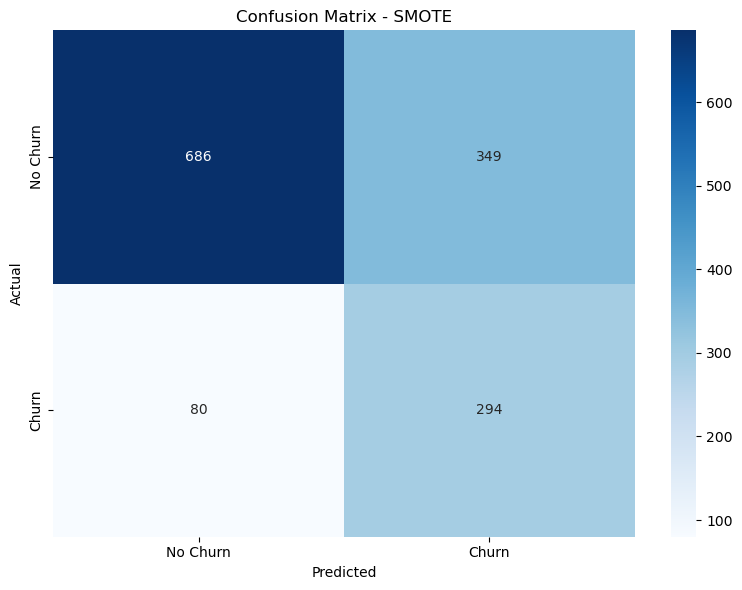


Confusion Matrix Details:
True Negatives: 686
False Positives: 349
False Negatives: 80
True Positives: 294

===== ADASYN =====
Accuracy: 0.6920
F1 Score: 0.5803
Precision: 0.4545
Recall: 0.8021
ROC AUC: 0.7801
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1035
           1       0.45      0.80      0.58       374

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.69      0.71      1409



d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


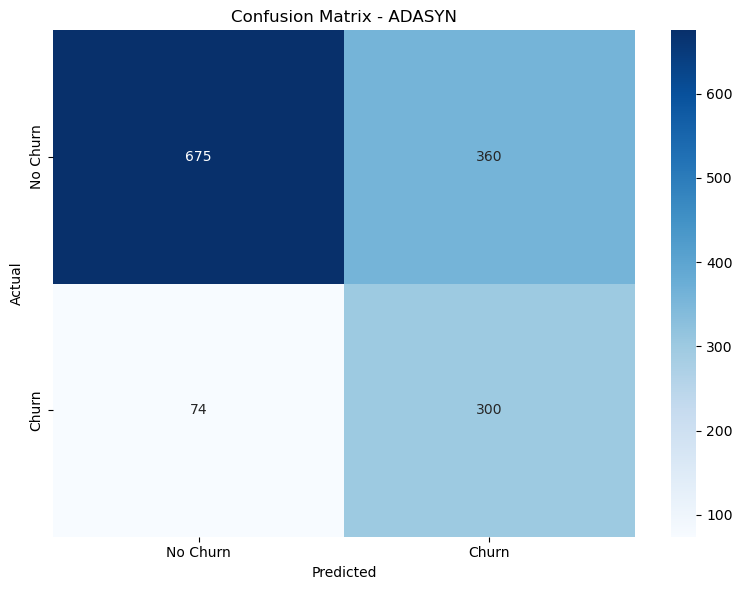


Confusion Matrix Details:
True Negatives: 675
False Positives: 360
False Negatives: 74
True Positives: 300

===== RandomUnderSampler =====
Accuracy: 0.6955
F1 Score: 0.5748
Precision: 0.4567
Recall: 0.7754
ROC AUC: 0.7808
              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1035
           1       0.46      0.78      0.57       374

    accuracy                           0.70      1409
   macro avg       0.67      0.72      0.67      1409
weighted avg       0.78      0.70      0.71      1409



d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


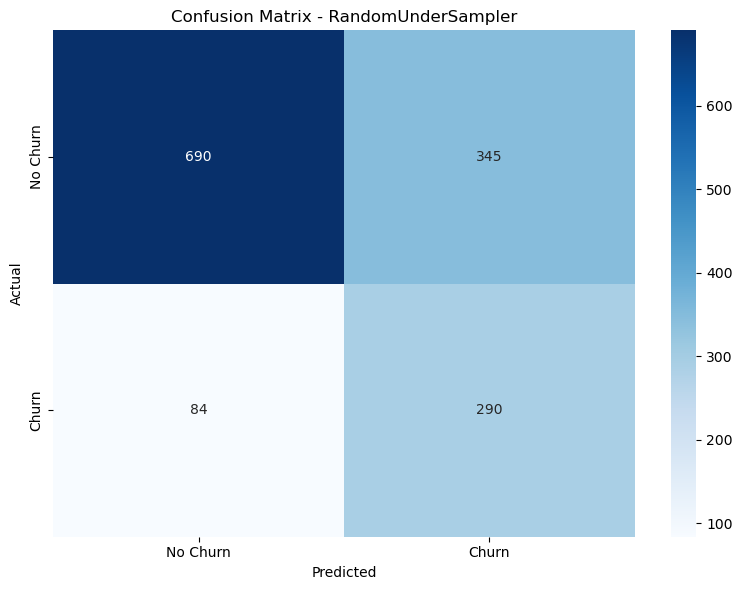


Confusion Matrix Details:
True Negatives: 690
False Positives: 345
False Negatives: 84
True Positives: 290

===== SMOTETomek =====
Accuracy: 0.6955
F1 Score: 0.5782
Precision: 0.4572
Recall: 0.7861
ROC AUC: 0.7796
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.79      0.58       374

    accuracy                           0.70      1409
   macro avg       0.68      0.72      0.67      1409
weighted avg       0.78      0.70      0.71      1409



d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


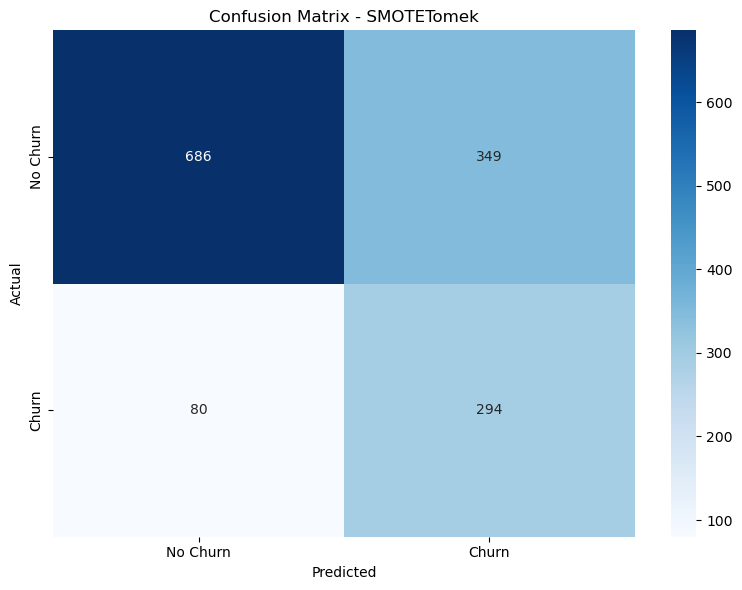


Confusion Matrix Details:
True Negatives: 686
False Positives: 349
False Negatives: 80
True Positives: 294

===== SMOTE (70%) =====
Accuracy: 0.6955
F1 Score: 0.5782
Precision: 0.4572
Recall: 0.7861
ROC AUC: 0.7801
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.79      0.58       374

    accuracy                           0.70      1409
   macro avg       0.68      0.72      0.67      1409
weighted avg       0.78      0.70      0.71      1409



d:\CODE\ANACONDA\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


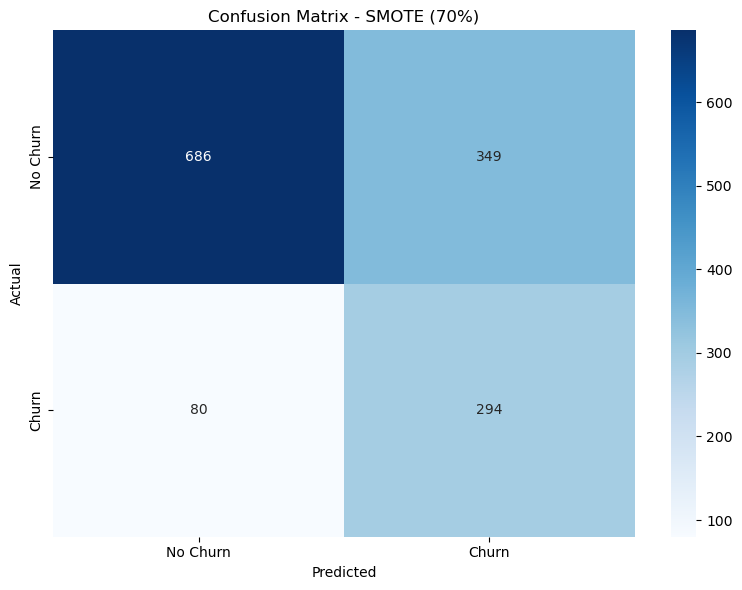


Confusion Matrix Details:
True Negatives: 686
False Positives: 349
False Negatives: 80
True Positives: 294

===== So sánh các phương pháp =====
               Method  Accuracy        F1  Precision    Recall       AUC
0          Base Model  0.694819  0.576772   0.456386  0.783422  0.779963
1               SMOTE  0.695529  0.578171   0.457232  0.786096  0.780010
2              ADASYN  0.691980  0.580271   0.454545  0.802139  0.780077
3  RandomUnderSampler  0.695529  0.574827   0.456693  0.775401  0.780842
4          SMOTETomek  0.695529  0.578171   0.457232  0.786096  0.779584
5         SMOTE (70%)  0.695529  0.578171   0.457232  0.786096  0.780056

Phương pháp tốt nhất dựa trên F1 score: ADASYN
✅ Mô hình tốt nhất và scaler đã được lưu!


In [2]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Đọc dữ liệu
df = pd.read_csv("processed_data.csv")

# Kiểm tra và mã hóa Contract nếu cần
if df["Contract"].dtype == "O":
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    df["Contract"] = encoder.fit_transform(df["Contract"])

# Chia dữ liệu
X = df[["MonthlyCharges", "Contract"]]
y = df["Churn"]

# Chia theo tỷ lệ phân tầng (giữ nguyên phân bố của biến mục tiêu)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train[["MonthlyCharges"]] = scaler.fit_transform(X_train[["MonthlyCharges"]])
X_test[["MonthlyCharges"]] = scaler.transform(X_test[["MonthlyCharges"]])

# Kiểm tra phân bố ban đầu
print("Phân bố ban đầu của y_train:")
print(y_train.value_counts(normalize=True))

# Tạo một hàm để đánh giá và so sánh các phương pháp khác nhau
def evaluate_model(X_train, y_train, X_test, y_test, model_name):
    model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"\n===== {model_name} =====")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Thêm phần tạo và hiển thị confusion matrix
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_")}.png')
    plt.show()
    
    # Tính các giá trị từ confusion matrix
    tn, fp, fn, tp = cm.ravel()
    print(f"\nConfusion Matrix Details:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    return model, accuracy, f1, precision, recall, roc_auc

# Đánh giá các phương pháp khác nhau
results = []

# 1. Mô hình cơ bản (không cân bằng)
model_base, acc_base, f1_base, prec_base, rec_base, auc_base = evaluate_model(X_train, y_train, X_test, y_test, "Mô hình cơ bản")

# 2. SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote, acc_smote, f1_smote, prec_smote, rec_smote, auc_smote = evaluate_model(X_train_smote, y_train_smote, X_test, y_test, "SMOTE")

# 3. ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
model_adasyn, acc_adasyn, f1_adasyn, prec_adasyn, rec_adasyn, auc_adasyn = evaluate_model(X_train_adasyn, y_train_adasyn, X_test, y_test, "ADASYN")

# 4. RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
model_rus, acc_rus, f1_rus, prec_rus, rec_rus, auc_rus = evaluate_model(X_train_rus, y_train_rus, X_test, y_test, "RandomUnderSampler")

# 5. SMOTETomek (kết hợp over và under sampling)
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
model_smote_tomek, acc_smote_tomek, f1_smote_tomek, prec_smote_tomek, rec_smote_tomek, auc_smote_tomek = evaluate_model(X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, "SMOTETomek")

# 6. SMOTE với sampling_strategy tùy chỉnh
smote_custom = SMOTE(sampling_strategy=0.7, random_state=42)  # 0.7 nghĩa là lớp thiểu số đạt 70% so với lớp đa số
X_train_smote_custom, y_train_smote_custom = smote_custom.fit_resample(X_train, y_train)
model_smote_custom, acc_smote_custom, f1_smote_custom, prec_smote_custom, rec_smote_custom, auc_smote_custom = evaluate_model(X_train_smote_custom, y_train_smote_custom, X_test, y_test, "SMOTE (70%)")

# Thu thập kết quả
results = [
    {"Method": "Base Model", "Accuracy": acc_base, "F1": f1_base, "Precision": prec_base, "Recall": rec_base, "AUC": auc_base},
    {"Method": "SMOTE", "Accuracy": acc_smote, "F1": f1_smote, "Precision": prec_smote, "Recall": rec_smote, "AUC": auc_smote},
    {"Method": "ADASYN", "Accuracy": acc_adasyn, "F1": f1_adasyn, "Precision": prec_adasyn, "Recall": rec_adasyn, "AUC": auc_adasyn},
    {"Method": "RandomUnderSampler", "Accuracy": acc_rus, "F1": f1_rus, "Precision": prec_rus, "Recall": rec_rus, "AUC": auc_rus},
    {"Method": "SMOTETomek", "Accuracy": acc_smote_tomek, "F1": f1_smote_tomek, "Precision": prec_smote_tomek, "Recall": rec_smote_tomek, "AUC": auc_smote_tomek},
    {"Method": "SMOTE (70%)", "Accuracy": acc_smote_custom, "F1": f1_smote_custom, "Precision": prec_smote_custom, "Recall": rec_smote_custom, "AUC": auc_smote_custom}
]

# Tạo DataFrame và hiển thị kết quả
results_df = pd.DataFrame(results)
print("\n===== So sánh các phương pháp =====")
print(results_df)

# Lưu mô hình tốt nhất (dựa trên F1 score)
best_method_idx = results_df["F1"].idxmax()
best_method = results_df.loc[best_method_idx, "Method"]
print(f"\nPhương pháp tốt nhất dựa trên F1 score: {best_method}")

# Lưu mô hình tốt nhất
if best_method == "Base Model":
    best_model = model_base
elif best_method == "SMOTE":
    best_model = model_smote
elif best_method == "ADASYN":
    best_model = model_adasyn
elif best_method == "RandomUnderSampler":
    best_model = model_rus
elif best_method == "SMOTETomek":
    best_model = model_smote_tomek
else:
    best_model = model_smote_custom

joblib.dump(best_model, "best_logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Mô hình tốt nhất và scaler đã được lưu!")

# Phân tích xu hướng Churn


📊 Thống kê Churn Rate theo loại hợp đồng:
         Contract  TotalCustomers  AvgMonthlyCharges  ChurnRate
0  Month-to-month            3875          66.398490      55.02
1        One year            1473          65.048608      20.91
2        Two year            1695          60.770413      24.07


C:\Users\bdz24\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


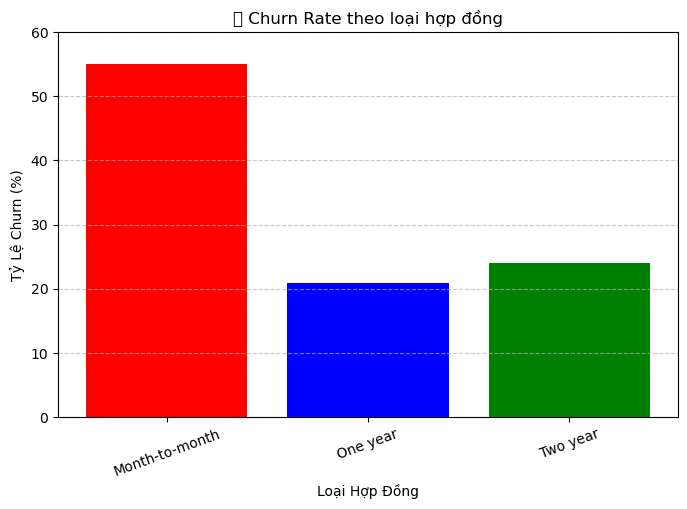

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 🚀 Bước 1: Đọc file CSV
df = pd.read_csv("thongke.csv", delimiter=";")

# 🚀 Bước 2: Đổi tên cột cho dễ đọc
df.columns = ["Contract", "TotalCustomers", "AvgMonthlyCharges", "ChurnRate"]

# 🚀 Bước 3: Chuyển ChurnRate về dạng phần trăm
df["ChurnRate"] = df["ChurnRate"].astype(float)  # Đảm bảo dữ liệu số
df["ChurnRate"] = df["ChurnRate"].round(2)  # Làm tròn 2 chữ số thập phân

# 🚀 Bước 4: Hiển thị bảng dữ liệu
print("\n📊 Thống kê Churn Rate theo loại hợp đồng:")
print(df)

# 🚀 Bước 5: Vẽ biểu đồ cột Churn Rate
plt.figure(figsize=(8, 5))
plt.bar(df["Contract"], df["ChurnRate"], color=['red', 'blue', 'green'])

plt.xlabel("Loại Hợp Đồng")
plt.ylabel("Tỷ Lệ Churn (%)")
plt.title("📊 Churn Rate theo loại hợp đồng")
plt.ylim(0, 60)  # Đặt giới hạn trục Y để nhìn rõ hơn
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 🚀 Bước 6: Hiển thị biểu đồ
plt.show()


# lọc dữ liệu theo Churn ("Yes" hoặc "No")

In [9]:
import pandas as pd

# 🚀 Bước 1: Đọc file CSV
df = pd.read_csv("xemfulldata.csv", delimiter=";", quotechar='"')  # Điều chỉnh delimiter nếu cần

# 🚀 Bước 2: Hiển thị tất cả các cột đầy đủ
pd.set_option("display.max_columns", None)  
pd.set_option("display.width", 1000)  

# 🚀 Bước 3: Lọc dữ liệu theo Churn
churn_value = input("Nhập giá trị Churn cần lọc (Yes/No): ").strip()  # Cho phép nhập Yes hoặc No
df_filtered = df[df["Churn"] == churn_value]  # Lọc dữ liệu theo Churn

# 🚀 Bước 4: Hiển thị dữ liệu lọc được
print(f"\n📊 Dữ liệu với Churn = {churn_value}:")
print(df_filtered.head(10))  # Hiển thị 10 dòng đầu tiên

# 🚀 Bước 5: Lưu dữ liệu lọc vào file mới (nếu cần)
df_filtered.to_csv(f"filtered_churn_{churn_value}.csv", index=False)

print(f"\n✅ File filtered_churn_{churn_value}.csv đã được lưu!")



📊 Dữ liệu với Churn = Yes:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn
2   3668-QPYBK    Male              0      No         No       2          Yes                No             DSL                  Yes                  Yes                   No                   No                   No                   No  Month-to-month              Yes               Mailed check           53.85        108.15   Yes
4   9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic                   No                   No                   No                   No                   No                   No  Month-to-month              Yes           Electronic check       

# Tìm kiếm

In [13]:
import pandas as pd

# 🚀 Bước 1: Đọc file dữ liệu đầy đủ
df = pd.read_csv("xemfulldata.csv", delimiter=";", quotechar='"')

# 🚀 Bước 2: Hiển thị tất cả các cột rõ ràng
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# 🚀 Bước 3: Cho người dùng chọn loại tìm kiếm
print("🔍 Chọn phương thức tìm kiếm:")
print("1️⃣ Tìm kiếm thông tin khách hàng cụ thể theo CustomerID")
print("2️⃣ Lọc nhóm khách hàng theo điều kiện (Churn, Contract, MonthlyCharges, v.v.)")
choice = input("Nhập lựa chọn (1 hoặc 2): ").strip()

# 🚀 Bước 4: Tìm kiếm khách hàng cụ thể
if choice == "1":
    customer_id = input("Nhập CustomerID cần tìm: ").strip()
    customer_data = df[df["customerID"] == customer_id]

    if customer_data.empty:
        print("\n❌ Không tìm thấy khách hàng!")
    else:
        print("\n📊 Thông tin khách hàng:")
        print(customer_data)

# 🚀 Bước 5: Lọc nhóm khách hàng theo điều kiện
elif choice == "2":
    print("\n🔍 Bạn có thể lọc theo:")
    print("- 1: Churn (Yes/No)")
    print("- 2: Contract (Month-to-month, One year, Two year)")
    print("- 3: MonthlyCharges (Ví dụ: lớn hơn 50)")
    
    filter_choice = input("Nhập số tương ứng điều kiện lọc: ").strip()

    if filter_choice == "1":
        churn_value = input("Nhập Churn (Yes hoặc No): ").strip()
        filtered_df = df[df["Churn"] == churn_value]
    elif filter_choice == "2":
        contract_type = input("Nhập loại hợp đồng (Month-to-month, One year, Two year): ").strip()
        filtered_df = df[df["Contract"] == contract_type]
    elif filter_choice == "3":
        min_charge = float(input("Nhập mức MonthlyCharges tối thiểu: ").strip())
        filtered_df = df[df["MonthlyCharges"] >= min_charge]
    else:
        print("❌ Lựa chọn không hợp lệ!")
        exit()

    # Hiển thị kết quả lọc
    print("\n📊 Kết quả lọc nhóm khách hàng:")
    print(filtered_df.head(10))  # Hiển thị 10 dòng đầu tiên

    # Xuất kết quả ra file CSV
    filtered_df.to_csv("filtered_customers.csv", index=False)
    print("\n✅ Kết quả lọc đã được lưu vào filtered_customers.csv!")

else:
    print("\n❌ Lựa chọn không hợp lệ!")


🔍 Chọn phương thức tìm kiếm:
1️⃣ Tìm kiếm thông tin khách hàng cụ thể theo CustomerID
2️⃣ Lọc nhóm khách hàng theo điều kiện (Churn, Contract, MonthlyCharges, v.v.)

📊 Thông tin khách hàng:
    customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies  Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn
21  1680-VDCWW   Male              0     Yes         No      12          Yes            No              No  No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  One year               No  Bank transfer (automatic)            19.8        202.25    No
